**IMPORTING LIBRARIES**

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**READING THE IMAGE**

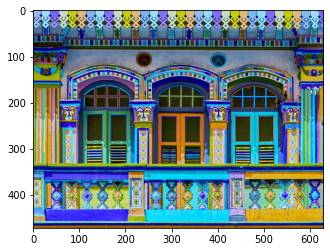

In [2]:
image=cv2.imread("pic2.jpg")
plt.imshow(image)

**CSV CONTAINING COLOURS**

In [3]:
col_names=['color','color_name','hex_code','R','G','B']
color_csv=pd.read_csv("colors.csv",names=col_names,header=None)
color_csv.head()

,color,color_name,hex_code,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [4]:
color_csv.shape

(865, 6)

In [5]:
image=cv2.resize(image,(800,600))

**SETTING INITIAL MOUSE ACTIVITY TO FALSE**

In [6]:
clicked = False

**FUNCTION CHECKING FOR CLICK AND FINDING THE BGR VALUE AT THAT CO-ORDINATE OF CLICK**

In [7]:
def draw_function(event,x,y,flags,params):
    if(event== cv2.EVENT_LBUTTONDBLCLK):
        global xcor,ycor,b,g,r,clicked
        clicked=True
        xcor=x
        ycor=y
        b,g,r=image[ycor,xcor]
        b=int(b)
        g=int(g)
        r=int(r)

**FUNCTION FINDING COLOUR IN CSV USING ABSOLUTE VALUE OF BGR**

In [8]:
def colour_name(R,G,B):
    mini = 1000
    for i in range(len(color_csv)):
        diff = abs(R - int(color_csv.loc[i,'R'])) + abs(G - int(color_csv.loc[i,'G'])) + abs(B - int(color_csv.loc[i,'B']))
        if diff <= mini:
            mini = diff
            colour = color_csv.loc[i, 'color_name']
    return colour 

**FINDING COLOURS IN IMAGE**

In [9]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [10]:
while True:
    cv2.imshow('image', image)
    if clicked: 
        cv2.rectangle(image, (20,20), (600,60), (b,g,r), -1)
        text = colour_name(r,g,b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        cv2.putText(image, text, (50,50), 2,0.8, (255,255,255),2,cv2.LINE_AA)
        if r+g+b >=600:
            cv2.putText(image, text, (50,50), 2,0.8, (0,0,0),2,cv2.LINE_AA)

    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()